# Odometry Visualization

This notebook provides modular blocks to load and visualize odometry data from CSV files.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial.transform import Rotation as R

%matplotlib inline

## Data Loading

Function to load odometry data from a CSV file into a Pandas DataFrame.

In [ ]:
def load_odometry_data(csv_path):
    """
    Loads odometry data from a CSV file.
    
    Args:
        csv_path (str): Path to the CSV file.
        
    Returns:
        pd.DataFrame: DataFrame containing the odometry data.
    """
    try:
        df = pd.read_csv(csv_path)
        print(f"Successfully loaded {len(df)} records from {csv_path}")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {csv_path}")
        return None
    except Exception as e:
        print(f"Error loading data: {e}")
        return None

## 2D Plotting

Function to plot the 2D trajectory (X-Y plane).

In [ ]:
def plot_odometry_2d(df, title="Odometry Trajectory (2D)", color='b', label='Trajectory'):
    """
    Plots the 2D trajectory (X vs Y) of the odometry data.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'pos_x' and 'pos_y' columns.
        title (str): Title of the plot.
        color (str): Color of the plot line.
        label (str): Label for the legend.
    """
    if df is None:
        print("No data to plot.")
        return
        
    plt.figure(figsize=(10, 6))
    plt.plot(df['pos_x'], df['pos_y'], color=color, label=label, linewidth=1)
    plt.scatter(df['pos_x'].iloc[0], df['pos_y'].iloc[0], c='g', marker='o', label='Start')
    plt.scatter(df['pos_x'].iloc[-1], df['pos_y'].iloc[-1], c='r', marker='x', label='End')
    
    plt.title(title)
    plt.xlabel("Position X (m)")
    plt.ylabel("Position Y (m)")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

## 3D Plotting

Function to plot the 3D trajectory.

In [ ]:
def plot_odometry_3d(df, title="Odometry Trajectory (3D)", color='b', label='Trajectory'):
    """
    Plots the 3D trajectory (X, Y, Z) of the odometry data.
    
    Args:
        df (pd.DataFrame): DataFrame containing 'pos_x', 'pos_y', and 'pos_z' columns.
        title (str): Title of the plot.
        color (str): Color of the plot line.
        label (str): Label for the legend.
    """
    if df is None:
        print("No data to plot.")
        return
        
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.plot(df['pos_x'], df['pos_y'], df['pos_z'], color=color, label=label, linewidth=1)
    ax.scatter(df['pos_x'].iloc[0], df['pos_y'].iloc[0], df['pos_z'].iloc[0], c='g', marker='o', label='Start')
    ax.scatter(df['pos_x'].iloc[-1], df['pos_y'].iloc[-1], df['pos_z'].iloc[-1], c='r', marker='x', label='End')
    
    ax.set_title(title)
    ax.set_xlabel("Position X (m)")
    ax.set_ylabel("Position Y (m)")
    ax.set_zlabel("Position Z (m)")
    ax.legend()
    plt.show()

## Visualization Execution

Define paths and run the visualization.

In [ ]:
# Define paths to your CSV files
lidar_csv_path = '/home/nail/other_work/Ro/CL_Calib/calib_ws/src/data/store_v1/lidar_odom.csv'
visual_csv_path = '/home/nail/other_work/Ro/CL_Calib/calib_ws/src/data/store_v1/visual_odom.csv'

# Load Data
print("Loading Lidar Odometry Data...")
df_lidar = load_odometry_data(lidar_csv_path)

print("\nLoading Visual Odometry Data...")
df_visual = load_odometry_data(visual_csv_path)

# Plot Lidar Odometry
if df_lidar is not None:
    plot_odometry_2d(df_lidar, title="Lidar Odometry (2D)", color='blue', label='Lidar Odom')
    plot_odometry_3d(df_lidar, title="Lidar Odometry (3D)", color='blue', label='Lidar Odom')

# Plot Visual Odometry
if df_visual is not None:
    plot_odometry_2d(df_visual, title="Visual Odometry (2D)", color='orange', label='Visual Odom')
    plot_odometry_3d(df_visual, title="Visual Odometry (3D)", color='orange', label='Visual Odom')

In [ ]:
# Comparison Plot (if both are available)
if df_lidar is not None and df_visual is not None:
    plt.figure(figsize=(12, 8))
    plt.plot(df_lidar['pos_x'], df_lidar['pos_y'], 'b-', label='Lidar Odom', linewidth=1)
    plt.plot(df_visual['pos_x'], df_visual['pos_y'], 'orange', label='Visual Odom', linewidth=1, linestyle='--')
    
    plt.title("Trajectory Comparison: Lidar vs Visual")
    plt.xlabel("Position X (m)")
    plt.ylabel("Position Y (m)")
    plt.grid(True)
    plt.legend()
    plt.axis('equal')
    plt.show()

## Extrinsic Calibration Visualization

Visualize the estimated extrinsic parameters (Translation and Rotation) over time.

Loading Extrinsic Data from: /home/nail/other_work/Ro/CL_Calib/calib_ws/src/data/store_v1/time_synced.csv
Successfully loaded 249 records from /home/nail/other_work/Ro/CL_Calib/calib_ws/src/data/store_v1/time_synced.csv


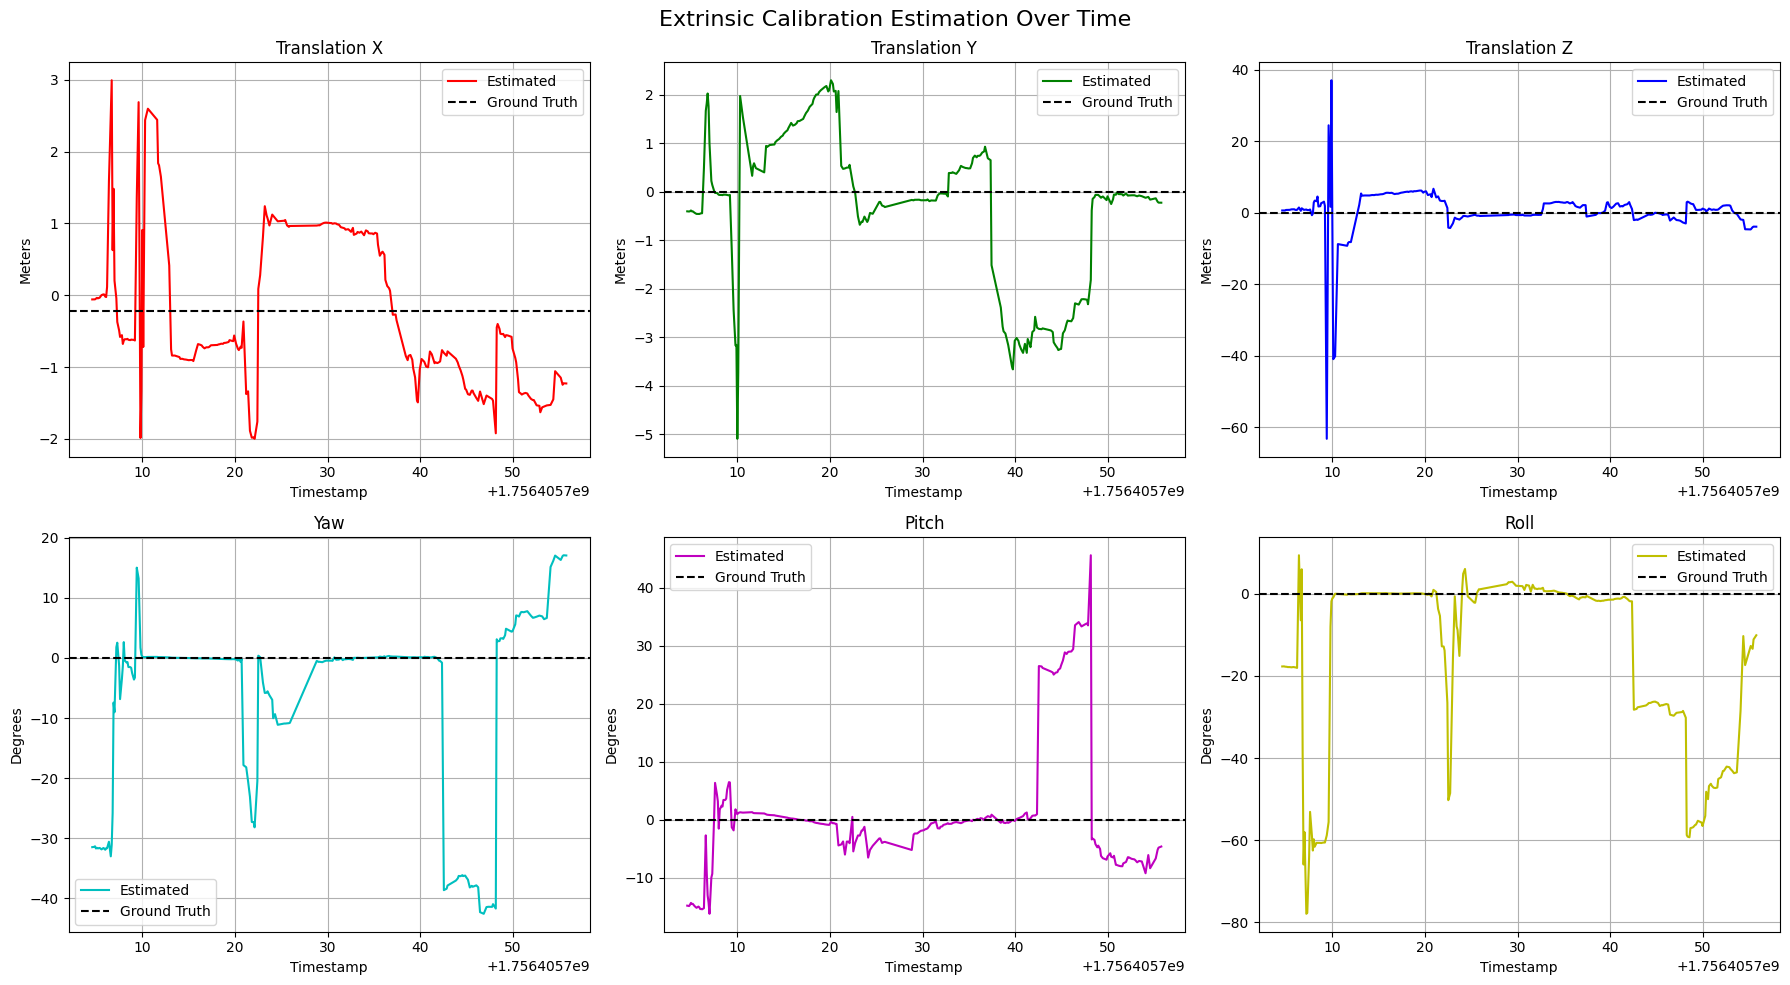

In [17]:
# Load Time-Synced Extrinsic Data
extrinsic_csv_path = '/home/nail/other_work/Ro/CL_Calib/calib_ws/src/data/store_v1/time_synced.csv'
print(f"Loading Extrinsic Data from: {extrinsic_csv_path}")
df_extrinsic = load_odometry_data(extrinsic_csv_path)

# Ground Truth Extrinsics (Replace with actual values)
# Format: [x, y, z] and [yaw, pitch, roll] in degrees
ground_truth_pos = [-0.22236458, -0.00353404, -0.00112897] # Example: from params.yaml baseline_trans
ground_truth_ypr = [0, 0, 0] # Example: Placeholder

if df_extrinsic is not None:
    # Convert Quaternions to Euler Angles (Yaw, Pitch, Roll)
    quats = df_extrinsic[['orient_x', 'orient_y', 'orient_z', 'orient_w']].values
    r = R.from_quat(quats)
    euler_angles = r.as_euler('zyx', degrees=True) # Yaw, Pitch, Roll
    
    df_extrinsic['yaw'] = euler_angles[:, 0]
    df_extrinsic['pitch'] = euler_angles[:, 1]
    df_extrinsic['roll'] = euler_angles[:, 2]
    
    # Create 2x3 Subplots
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Extrinsic Calibration Estimation Over Time', fontsize=16)
    
    # Plot Translation X
    axs[0, 0].plot(df_extrinsic['timestamp'], df_extrinsic['pos_x'], 'r', label='Estimated')
    axs[0, 0].axhline(y=ground_truth_pos[0], color='k', linestyle='--', label='Ground Truth')
    axs[0, 0].set_title('Translation X')
    axs[0, 0].set_xlabel('Timestamp')
    axs[0, 0].set_ylabel('Meters')
    axs[0, 0].grid(True)
    axs[0, 0].legend()
    
    # Plot Translation Y
    axs[0, 1].plot(df_extrinsic['timestamp'], df_extrinsic['pos_y'], 'g', label='Estimated')
    axs[0, 1].axhline(y=ground_truth_pos[1], color='k', linestyle='--', label='Ground Truth')
    axs[0, 1].set_title('Translation Y')
    axs[0, 1].set_xlabel('Timestamp')
    axs[0, 1].set_ylabel('Meters')
    axs[0, 1].grid(True)
    axs[0, 1].legend()
    
    # Plot Translation Z
    axs[0, 2].plot(df_extrinsic['timestamp'], df_extrinsic['pos_z'], 'b', label='Estimated')
    axs[0, 2].axhline(y=ground_truth_pos[2], color='k', linestyle='--', label='Ground Truth')
    axs[0, 2].set_title('Translation Z')
    axs[0, 2].set_xlabel('Timestamp')
    axs[0, 2].set_ylabel('Meters')
    axs[0, 2].grid(True)
    axs[0, 2].legend()
    
    # Plot Yaw
    axs[1, 0].plot(df_extrinsic['timestamp'], df_extrinsic['yaw'], 'c', label='Estimated')
    axs[1, 0].axhline(y=ground_truth_ypr[0], color='k', linestyle='--', label='Ground Truth')
    axs[1, 0].set_title('Yaw')
    axs[1, 0].set_xlabel('Timestamp')
    axs[1, 0].set_ylabel('Degrees')
    axs[1, 0].grid(True)
    axs[1, 0].legend()
    
    # Plot Pitch
    axs[1, 1].plot(df_extrinsic['timestamp'], df_extrinsic['pitch'], 'm', label='Estimated')
    axs[1, 1].axhline(y=ground_truth_ypr[1], color='k', linestyle='--', label='Ground Truth')
    axs[1, 1].set_title('Pitch')
    axs[1, 1].set_xlabel('Timestamp')
    axs[1, 1].set_ylabel('Degrees')
    axs[1, 1].grid(True)
    axs[1, 1].legend()
    
    # Plot Roll
    axs[1, 2].plot(df_extrinsic['timestamp'], df_extrinsic['roll'], 'y', label='Estimated')
    axs[1, 2].axhline(y=ground_truth_ypr[2], color='k', linestyle='--', label='Ground Truth')
    axs[1, 2].set_title('Roll')
    axs[1, 2].set_xlabel('Timestamp')
    axs[1, 2].set_ylabel('Degrees')
    axs[1, 2].grid(True)
    axs[1, 2].legend()
    
    plt.tight_layout()
    plt.show()